In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('database.csv')
df.info()

factorized_mapping = dict(enumerate(df['classificacao'].unique()))
df['classificacao'] = pd.factorize(df['classificacao'])[0]
print(factorized_mapping)

features = df[['intensidade_sonora', 'pressao_kpa', 'temperatura_c', 'luminosidade_lux', 'umidade_percentual']]
labels = df['classificacao']

labels_one_hot = pd.get_dummies(labels).values
features_train, features_test, labels_train, labels_test = train_test_split(features, labels_one_hot, test_size=0.3, random_state=0)

model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=(5,)),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=len(factorized_mapping), activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(features_train, labels_train, epochs=200, validation_data=(features_test, labels_test))

test_loss, test_accuracy = model.evaluate(features_test, labels_test)
print("Test Accuracy:", test_accuracy)

data_test = pd.read_csv('test.csv')
predictions = model.predict(data_test)
rounded_predictions = np.argmax(predictions, axis=1)
original_predictions = [factorized_mapping[prediction] for prediction in rounded_predictions]

print("Predictions:", original_predictions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   intensidade_sonora  211 non-null    int64 
 1   pressao_kpa         211 non-null    int64 
 2   temperatura_c       211 non-null    int64 
 3   luminosidade_lux    211 non-null    int64 
 4   umidade_percentual  211 non-null    int64 
 5   classificacao       211 non-null    object
dtypes: int64(5), object(1)
memory usage: 10.0+ KB
{0: 'toleravel', 1: 'intoleravel', 2: 'otimo', 3: 'bom'}
Epoch 1/200
5/5 [==============================] - 1s 56ms/step - loss: 445.6101 - accuracy: 0.1701 - val_loss: 370.7927 - val_accuracy: 0.3750
Epoch 2/200
5/5 [==============================] - 0s 9ms/step - loss: 281.6023 - accuracy: 0.3333 - val_loss: 296.9563 - val_accuracy: 0.4688
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 221.2391 - accuracy: 0.3605 - val_loss: 245.2

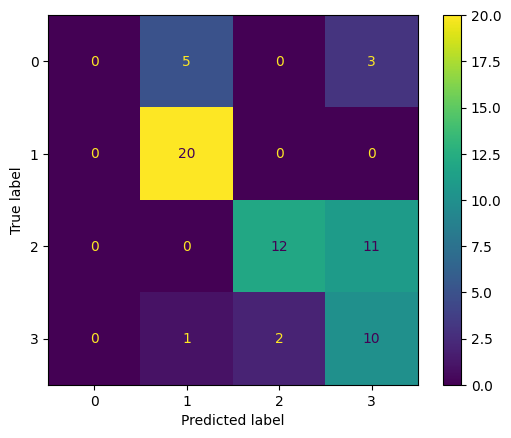

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
y_pred = model.predict(features_test, verbose=0).argmax(axis=1)
y_true = labels_test.argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize=None)
plt.show()

In [5]:
import tensorflow as tf

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("weather_model.tflite", "wb").write(tflite_model)

5276

In [6]:
import os
basic_model_size = os.path.getsize("weather_model.tflite")
print("Model is %d bytes" % basic_model_size)

"""# Encode the Model in an Arduino Header File"""

!echo "const unsigned char model[] = {" > /content/model.h
!cat weather_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

Model is 5276 bytes


In [7]:
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 32,570 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


##Teste para gera imagem na rede neural

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pressao_kpa         211 non-null    int64 
 1   temperatura_c       211 non-null    int64 
 2   luminosidade_lux    211 non-null    int64 
 3   umidade_percentual  211 non-null    int64 
 4   classificacao       211 non-null    object
dtypes: int64(4), object(1)
memory usage: 8.4+ KB
{0: 'toleravel', 1: 'intoleravel', 2: 'otimo', 3: 'bom'}
Epoch 1/200
5/5 [==============================] - 2s 138ms/step - loss: 160.5628 - accuracy: 0.1224 - val_loss: 138.4209 - val_accuracy: 0.2344
Epoch 2/200
5/5 [==============================] - 0s 38ms/step - loss: 104.8761 - accuracy: 0.1361 - val_loss: 116.8265 - val_accuracy: 0.3125
Epoch 3/200
5/5 [==============================] - 0s 21ms/step - loss: 91.3106 - accuracy: 0.1905 - val_loss: 93.8717 - val_accuracy: 0.0312
Epoch 4/200
5/5 [=====

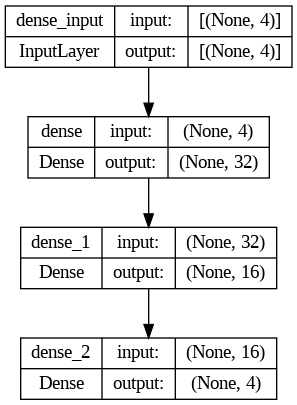

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model


df = pd.read_csv('database.csv')
df.info()

factorized_mapping = dict(enumerate(df['classificacao'].unique()))
df['classificacao'] = pd.factorize(df['classificacao'])[0]
print(factorized_mapping)

features = df[['pressao_kpa', 'temperatura_c', 'luminosidade_lux', 'umidade_percentual']]
labels = df['classificacao']

labels_one_hot = pd.get_dummies(labels).values
features_train, features_test, labels_train, labels_test = train_test_split(features, labels_one_hot, test_size=0.3, random_state=0)

model = keras.Sequential([
    keras.layers.Dense(units=32, activation='relu', input_shape=(4,)),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=len(factorized_mapping), activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(features_train, labels_train, epochs=200, validation_data=(features_test, labels_test))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)